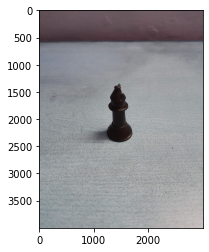

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "drive/MyDrive/Chess_Piece_Images"
CATEGORIES = [ "Black_Bishop" , "White_Bishop" , "Black_Knight" , "White_Knight" , "Black_Rook" , "White_Rook" , 
              "Black_King" , "White_King"  , "Black_Queen" , "White_Queen" , "Black_Pawn" , "White_Pawn"]

for category in CATEGORIES : 
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path) :
        img_array = cv2.imread(os.path.join(path,img) )  # cv2.IMREAD_GRAYSCALE
        plt.imshow(img_array)
        break
    break

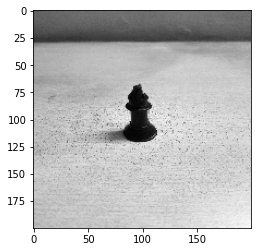

In [2]:
IMG_SIZE = 200

new_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
gray  = gray = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)

plt.imshow(gray , cmap="gray")
plt.show()

In [3]:
training_data = []

def create_training_data() :
    for category in CATEGORIES : 
        path = os.path.join(DATADIR,category)
    
        class_num = CATEGORIES.index(category) 
    
        for img in os.listdir(path) :
            
            
            img_array = cv2.imread(os.path.join(path,img)) # cv2.IMREAD_GRAYSCALE
                
            new_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
                #training_data.append([new_array, class_num])
                
            #gray = cv2.cvtColor(new_array)
            training_data.append([new_array  , class_num])
            
            
        
create_training_data()

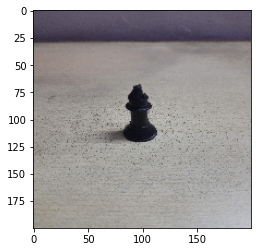

In [4]:
new_image = cv2.cvtColor(training_data[0][0] , cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

In [5]:
import random
random.shuffle(training_data)

Text(0.5, 1.0, 'Black_Bishop')

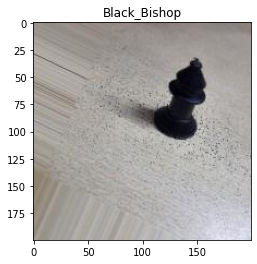

In [9]:
import random

index = random.randint(0,2520)
img_arr = cv2.cvtColor(training_data[index][0] , cv2.COLOR_BGR2RGB)




y = training_data[index][1]

plt.imshow(img_arr , cmap="gray")
plt.title(CATEGORIES[y])

In [80]:
pd.DataFrame(training_data)[1].value_counts()

5     210
6     210
10    210
4     210
0     210
3     210
11    210
7     210
8     210
2     210
9     210
1     210
Name: 1, dtype: int64

In [97]:
X = []
y = []

for features , label in training_data :
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE , IMG_SIZE , 3) 

In [98]:
tf.math.reduce_max(X)

<tf.Tensor: shape=(), dtype=uint8, numpy=255>

In [12]:
X = X/255.0

In [96]:
tf.math.reduce_max(X)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

In [81]:
pd.DataFrame(y).value_counts()

0     210
1     210
2     210
3     210
4     210
5     210
6     210
7     210
8     210
9     210
10    210
11    210
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size = 0.2)

In [14]:
import tensorflow as tf


X_train , y_train = tf.constant(X_train , dtype = tf.float64) , tf.constant(y_train , dtype = tf.float64)
X_test , y_test = tf.constant(X_test , dtype = tf.float64) , tf.constant(y_test , dtype = tf.float64)

In [15]:
len(X_train) , len(y_train) 

(2016, 2016)

In [16]:
len(X_test) , len(y_test)

(504, 504)

In [82]:
pd.DataFrame(y_train).value_counts()

10.0    178
3.0     176
9.0     171
4.0     170
6.0     170
5.0     168
7.0     168
0.0     167
8.0     166
1.0     165
2.0     159
11.0    158
dtype: int64

In [83]:
pd.DataFrame(y_test).value_counts()

11.0    52
2.0     51
1.0     45
8.0     44
0.0     43
5.0     42
7.0     42
4.0     40
6.0     40
9.0     39
3.0     34
10.0    32
dtype: int64


 CATEGORIES = [ "Black_Bishop" , "White_Bishop" , "Black_Knight" , "White_Knight" , "Black_Rook" , "White_Rook" , "Black_King" , "White_King", "Black_Queen" , "White_Queen" , "Black_Pawn" , "White_Pawn"]

In [18]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(12 , (3,3) , activation = 'softmax' , padding = 'same') ,

                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam() , 
                  metrics = ['accuracy'])

#3. Learning Rate Schedular
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * (10)**(epoch/20))

#4. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        callbacks = [lr_schedular] ,
                        validation_data = (X_test , y_test))


Epoch 1/50
63/63 [==============================] - 18s 114ms/step - loss: 2.4963 - accuracy: 0.0784 - val_loss: 2.5071 - val_accuracy: 0.0635 - lr: 1.0000e-04
Epoch 2/50
63/63 [==============================] - 6s 95ms/step - loss: 2.4972 - accuracy: 0.0764 - val_loss: 2.5009 - val_accuracy: 0.0794 - lr: 1.1220e-04
Epoch 3/50
63/63 [==============================] - 6s 94ms/step - loss: 2.4954 - accuracy: 0.0794 - val_loss: 2.5086 - val_accuracy: 0.0873 - lr: 1.2589e-04
Epoch 4/50
63/63 [==============================] - 6s 95ms/step - loss: 2.4962 - accuracy: 0.0898 - val_loss: 2.5022 - val_accuracy: 0.0893 - lr: 1.4125e-04
Epoch 5/50
63/63 [==============================] - 6s 96ms/step - loss: 2.4708 - accuracy: 0.0933 - val_loss: 2.3827 - val_accuracy: 0.1984 - lr: 1.5849e-04
Epoch 6/50
63/63 [==============================] - 6s 94ms/step - loss: 2.2352 - accuracy: 0.1994 - val_loss: 2.0625 - val_accuracy: 0.2560 - lr: 1.7783e-04
Epoch 7/50
63/63 [==============================] 

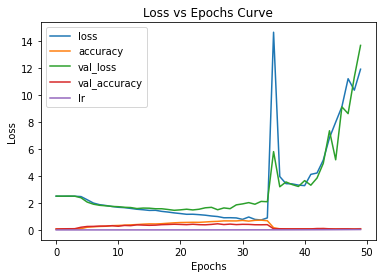

In [23]:
# Plot the loss vs epochs diagram
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs Curve")
plt.show()

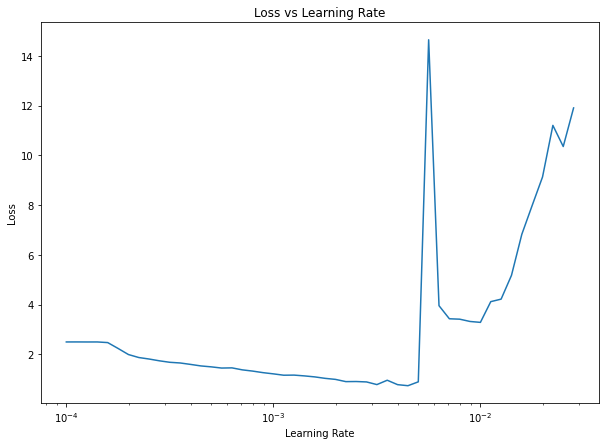

In [27]:
# Plot Loss vs Learning Rate curve

lrs = 1e-4 * (10**(tf.range(50)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Loss vs Learning Rate")
plt.show()



In [28]:
# Ideal learning rate seems to be around 5*(10**(-3))

In [52]:
y_probs = tf.constant(cnn_model.predict(X_test))

In [54]:
y_preds = pd.DataFrame(tf.argmax(y_preds , axis = 1))
len(y_preds)

504

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_preds)

0.08531746031746032

In [36]:
# Using ideal learning rate 

import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(12 , (3,3) , activation = 'softmax' , padding = 'same') ,

                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])




#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        validation_data = (X_test , y_test))


Epoch 1/50
63/63 [==============================] - 7s 98ms/step - loss: 2.5706 - accuracy: 0.0853 - val_loss: 2.6456 - val_accuracy: 0.0893
Epoch 2/50
63/63 [==============================] - 6s 93ms/step - loss: 2.5484 - accuracy: 0.0858 - val_loss: 2.3526 - val_accuracy: 0.1905
Epoch 3/50
63/63 [==============================] - 6s 93ms/step - loss: 2.0110 - accuracy: 0.2197 - val_loss: 1.9758 - val_accuracy: 0.1746
Epoch 4/50
63/63 [==============================] - 6s 92ms/step - loss: 1.7655 - accuracy: 0.2907 - val_loss: 1.7671 - val_accuracy: 0.2718
Epoch 5/50
63/63 [==============================] - 6s 92ms/step - loss: 1.6243 - accuracy: 0.3517 - val_loss: 1.6769 - val_accuracy: 0.2698
Epoch 6/50
63/63 [==============================] - 6s 92ms/step - loss: 1.4967 - accuracy: 0.3899 - val_loss: 1.5979 - val_accuracy: 0.3631
Epoch 7/50
63/63 [==============================] - 6s 92ms/step - loss: 1.4362 - accuracy: 0.4286 - val_loss: 1.5511 - val_accuracy: 0.3790
Epoch 8/50
63

In [38]:
# Changing the network architecture

# Using ideal learning rate 

import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'softmax' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same'),

                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])




#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        validation_data = (X_test , y_test))

Epoch 1/50
63/63 [==============================] - 7s 97ms/step - loss: 2.5709 - accuracy: 0.0878 - val_loss: 2.6476 - val_accuracy: 0.0893
Epoch 2/50
63/63 [==============================] - 6s 92ms/step - loss: 2.5621 - accuracy: 0.0784 - val_loss: 2.5172 - val_accuracy: 0.0794
Epoch 3/50
63/63 [==============================] - 6s 94ms/step - loss: 2.5455 - accuracy: 0.0843 - val_loss: 2.6612 - val_accuracy: 0.0675
Epoch 4/50
63/63 [==============================] - 6s 93ms/step - loss: 2.5768 - accuracy: 0.0898 - val_loss: 2.6847 - val_accuracy: 0.0833
Epoch 5/50
63/63 [==============================] - 6s 95ms/step - loss: 2.5699 - accuracy: 0.0878 - val_loss: 2.5949 - val_accuracy: 0.0873
Epoch 6/50
63/63 [==============================] - 6s 93ms/step - loss: 2.5537 - accuracy: 0.0828 - val_loss: 2.5946 - val_accuracy: 0.0833
Epoch 7/50
63/63 [==============================] - 6s 93ms/step - loss: 2.5799 - accuracy: 0.0774 - val_loss: 2.5787 - val_accuracy: 0.0794
Epoch 8/50
63

In [88]:
y_probs = cnn_model.predict(X_test)
y_probs

array([[0.08814555, 0.04068923, 0.05812258, ..., 0.04289176, 0.05511189,
        0.06026721],
       [0.0881455 , 0.04068922, 0.05812251, ..., 0.04289168, 0.05511185,
        0.06026716],
       [0.08814555, 0.04068923, 0.05812258, ..., 0.04289176, 0.05511189,
        0.06026721],
       ...,
       [0.08814555, 0.04068923, 0.05812258, ..., 0.04289176, 0.05511189,
        0.06026721],
       [0.08814555, 0.04068923, 0.05812258, ..., 0.04289176, 0.05511189,
        0.06026721],
       [0.08814555, 0.04068923, 0.05812258, ..., 0.04289176, 0.05511189,
        0.06026721]], dtype=float32)

In [87]:
y_preds = tf.argmax(y_probs , axis = 1)
y_preds

<tf.Tensor: shape=(504,), dtype=int64, numpy=
array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
     

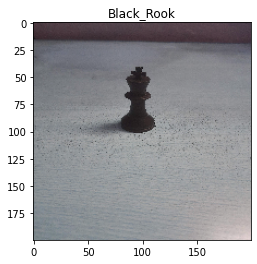

In [94]:
# Visualising model predictions
import random

index = random.randint(0,504)
random_image = X_test[index]
image_pred = CATEGORIES[y_preds[index]]

plt.imshow(random_image)
plt.title(image_pred)
plt.show()


In [47]:
X_test[503].shape

TensorShape([200, 200, 3])

In [68]:
y_preds[0][500]

0

In [75]:
y_preds.value_counts()

0    504
dtype: int64

### Currently the neural network is just predictin the same class for all inputs
### Potential Reason :  Model is not complex enough to understand the patterns in input
### Try :  Making the model more complex by adding layers


In [126]:

import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'sigmoid' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 # New Layer

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,


                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])




#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        validation_data = (X_test , y_test))

Epoch 1/50
63/63 [==============================] - 7s 104ms/step - loss: 2.5491 - accuracy: 0.0967 - val_loss: 2.5706 - val_accuracy: 0.0635
Epoch 2/50
63/63 [==============================] - 6s 98ms/step - loss: 2.5238 - accuracy: 0.0734 - val_loss: 2.5400 - val_accuracy: 0.0893
Epoch 3/50
63/63 [==============================] - 6s 99ms/step - loss: 2.5107 - accuracy: 0.0908 - val_loss: 2.5128 - val_accuracy: 0.0873
Epoch 4/50
63/63 [==============================] - 6s 99ms/step - loss: 2.1960 - accuracy: 0.1627 - val_loss: 1.9317 - val_accuracy: 0.1885
Epoch 5/50
63/63 [==============================] - 6s 98ms/step - loss: 1.8425 - accuracy: 0.2307 - val_loss: 1.7609 - val_accuracy: 0.2698
Epoch 6/50
63/63 [==============================] - 6s 98ms/step - loss: 1.7179 - accuracy: 0.2927 - val_loss: 1.6960 - val_accuracy: 0.2996
Epoch 7/50
63/63 [==============================] - 6s 98ms/step - loss: 1.6592 - accuracy: 0.2902 - val_loss: 1.6816 - val_accuracy: 0.2937
Epoch 8/50
6

In [127]:
# Fitting the model for another 50 epochs

#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        validation_data = (X_test , y_test))

Epoch 1/50
63/63 [==============================] - 6s 99ms/step - loss: 0.4859 - accuracy: 0.8313 - val_loss: 1.4420 - val_accuracy: 0.5040
Epoch 2/50
63/63 [==============================] - 6s 98ms/step - loss: 0.4952 - accuracy: 0.8219 - val_loss: 1.3870 - val_accuracy: 0.5060
Epoch 3/50
63/63 [==============================] - 6s 98ms/step - loss: 0.4807 - accuracy: 0.8279 - val_loss: 1.3753 - val_accuracy: 0.4921
Epoch 4/50
63/63 [==============================] - 6s 98ms/step - loss: 0.4417 - accuracy: 0.8542 - val_loss: 1.4055 - val_accuracy: 0.5159
Epoch 5/50
63/63 [==============================] - 6s 98ms/step - loss: 0.4211 - accuracy: 0.8651 - val_loss: 1.3788 - val_accuracy: 0.5020
Epoch 6/50
63/63 [==============================] - 6s 98ms/step - loss: 0.4069 - accuracy: 0.8725 - val_loss: 1.3913 - val_accuracy: 0.5238
Epoch 7/50
63/63 [==============================] - 6s 99ms/step - loss: 0.4311 - accuracy: 0.8542 - val_loss: 1.4437 - val_accuracy: 0.5397
Epoch 8/50
63

In [128]:
y_probs = cnn_model.predict(X_test)
y_preds = tf.argmax(y_probs , axis = 1)

In [129]:
pd.DataFrame(y_preds).value_counts()

7     57
1     48
0     46
2     46
6     44
3     40
10    40
4     38
8     37
9     37
11    36
5     35
dtype: int64

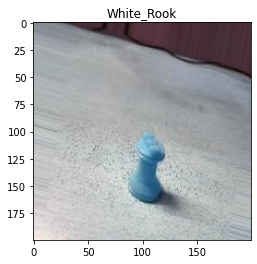

In [121]:
# Visualising model predictions
import random

index = random.randint(0,504)
random_image = X_test[index]
image_pred = CATEGORIES[y_preds[index]]

plt.imshow(random_image)
plt.title(image_pred)
plt.show()


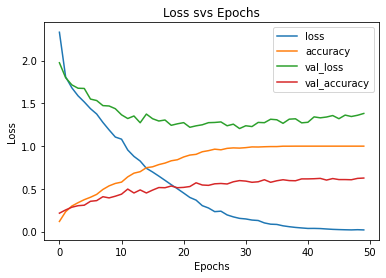

In [122]:
# Plot the Loss vs Epochs

pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss svs Epochs")
plt.show()

In [125]:
# Use Daniel Bourkee's code to plot a multi-class confusion matrix